## 1.0 Criação e Modelagem da base de dados

Um problema de modelagem pode diferir dependendo do desaﬁo que se está enfrentando, mas algumas etapas
geralmente são padronizadas.
Saber este framework pode te ajudar a organizar a forma de atacar um problema complexo e quebrá-lo em
etapas menores

 - Criação/Manipulação da base de dados
 - Tratamento das Variáveis (Variáveis Categóricas, Padronização, etc)
 - Aplicação do Modelo
 - Medição dos resultados

### Criação/Manipulação da base de dados

- Objetivo:
Extrair dados de todas as fontes necessárias, fazer as manipulações, cruzamentos de bases, tratamentos de nomes de colunas e tudo mais que for
necessário para organizar minha base de dados.

- O que preciso ter ao ﬁnal desta etapa:
Uma tabela de dados única, organizada, validada e conﬁável, com todas as variáveis que preciso (variáveis explicativas + variável resposta) como
colunas da tabela.

### Importando as Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importando a Base de Dados

In [2]:
df = pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

## 2.0 Tratamento das Variáveis(Variáveis Categóricas, Padronização, etc)

 - Objetivo:
Realizar tratamentos que sejam necessários nas variáveis para que os dados possam ser usados como entrada 
em um modelo estatístico.

 - O que preciso ter ao ﬁnal desta etapa:
Uma tabela única, onde todas as suas variáveis já estejam tratadas 
(variáveis categóricas tratadas, variáveis numéricas padronizadas, etc)

### Separando a Base de Dados em Treino e Teste

In [6]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3)

In [7]:
X_teste

array([[ 6.8],
       [ 8.2],
       [ 4.9],
       [ 8.7],
       [ 5.1],
       [ 3.9],
       [ 4. ],
       [10.3],
       [ 5.9]])

In [8]:
y_teste

array([ 91738., 113812.,  67938., 109431.,  66029.,  63218.,  56957.,
       122391.,  81363.])

## 3.0 Aplicação do Modelo

 - Objetivo:
Nesta etapa, já tenho uma tabela perfeita pronta para servir de insumo para um modelo. Nesta etapa iremos apenas escolher o
modelo adequado para aplicação e realizar sua aplicação.

 - O que preciso ter ao ﬁnal desta etapa:
Um modelo criado e treinado na tabela usada como insumo

### Aplicação do Modelo

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_treino, y_treino)

LinearRegression()

## Prevendo o Conjunto de Teste

In [12]:
y_prev = regressor.predict(X_teste)

### Visualizar os Resultados

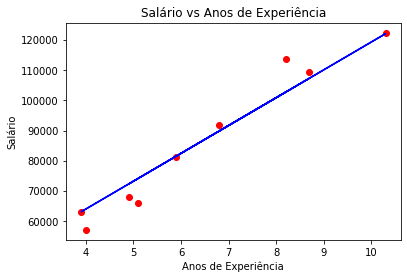

In [13]:
plt.scatter(X_teste, y_teste, color='red')
plt.plot(X_teste, y_prev, color = 'blue')
plt.title('Salário vs Anos de Experiência')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.show()

### Avaliando os Resultados

In [14]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

## 4.0 Medição dos resultados

 - Objetivo:
Medir se o modelo que usamos foi capaz de realizar de forma satisfatória a tarefa que era necessária.
Exemplo: Se precisávamos fazer uma previsão, precisamos medir o quanto o modelo acertou.

 - O que preciso ter ao ﬁnal desta etapa:
Uma métrica calculada, adequada para medir a performance do modelo. Para que possamos avaliar se precisamos rever a estratégia ou se podemos considerar o
problema como resolvido.

### Calculando o RMSE

In [15]:
erro = sqrt(mse(y_teste, y_prev))

In [16]:
erro

5447.701426348438

### Calculando o R²

In [17]:
from sklearn.metrics import r2_score as r2

In [18]:
erro = r2(y_teste, y_prev)

In [19]:
erro

0.9442234996074634